In [1]:
# Predição multivariada com Auto ARIMA usando pacote pmdarima

In [2]:
# Instala os pacotes necessários para utilizar o pmdarima

# Basta retirar os comentários e executar uma única vez
#!pip install pmdarima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

pd.options.display.float_format = '{:.2f}'.format

In [4]:
pasta = '../datasets/'

# Identifca os datasets
dataset_arrecadacao = 'arrecadacao_Brasil_ajustada.csv'
dataset_pib = 'pib.csv'
dataset_ipca = 'ipca.csv'

# Especifica os tipos de dados e nomes das columas
tipo_dados_arrecadacao = {'arrecadacao': np.float64}
tipo_dados_pib = {'pib': np.float64}
tipo_dados_ipca = {'indice_dez93': np.float64, 'no_mes': np.float64, '3_meses': np.float64, 
                   '6_meses': np.float64, 'no_ano': np.float64, '12_meses': np.float64}

In [5]:
# Carrega os dataframes arrecadação, PIB e IPCA
df_arrecadacao = pd.read_csv(pasta + dataset_arrecadacao, dtype=tipo_dados_arrecadacao, parse_dates=True, index_col='data')
df_pib = pd.read_csv(pasta + dataset_pib, dtype=tipo_dados_pib, parse_dates=True, index_col='data')
df_ipca = pd.read_csv(pasta + dataset_ipca, dtype=tipo_dados_ipca, parse_dates=True, index_col='data')

In [6]:
# Construir um Dataset agregando Arrecadação, PIB e IPCA

# Arrecadação + IPCA
df = pd.merge(df_arrecadacao, df_ipca, on="data")

# (Arrecadação + IPCA) + PIB
df = pd.merge(df, df_pib, on='data')

In [7]:
# Renomeia coluna 'no_mes' para 'IPCA', 'indice_dez93' para 'IPCA_dez93' e 'total' para 'arrecadacao'
df.rename(columns = {'no_mes':'IPCA', 'total': 'arrecadacao', 'indice_dez93': 'IPCA_dez93'}, inplace=True)

# Não serão utilizadas as columas do '3_meses', '6_meses' e '12_meses'
df_efetiva = df.drop(['3_meses','6_meses','no_ano','12_meses'], axis=1)

df_efetiva.head()

,arrecadacao,IPCA_dez93,IPCA,PIB
data,,,,
2004-01-01,25927.01,2246.43,0.76,148261.16
2004-02-01,21519.05,2260.13,0.61,148261.16
2004-03-01,23391.92,2270.75,0.47,148261.16
2004-04-01,25041.10,2279.15,0.37,160598.32
2004-05-01,23455.60,2290.77,0.51,160598.32


In [8]:
# Vamos realizar a previsão dos últimos 04 anos (2016 a 2019) e comparar com o efetivamente arrecadado

train = df_efetiva['2004-01-01':'2015-12-01']
test = df_efetiva['2016-01-01':'2019-12-01']

In [9]:
 train.head(), test.head()

(            arrecadacao  IPCA_dez93  IPCA       PIB
 data                                               
 2004-01-01     25927.01     2246.43  0.76 148261.16
 2004-02-01     21519.05     2260.13  0.61 148261.16
 2004-03-01     23391.92     2270.75  0.47 148261.16
 2004-04-01     25041.10     2279.15  0.37 160598.32
 2004-05-01     23455.60     2290.77  0.51 160598.32,
             arrecadacao  IPCA_dez93  IPCA       PIB
 data                                               
 2016-01-01     95278.45     4550.23  1.27 500075.24
 2016-02-01     57208.30     4591.18  0.90 500075.24
 2016-03-01     64651.41     4610.92  0.43 500075.24
 2016-04-01     79122.10     4639.05  0.61 519663.84
 2016-05-01     62658.41     4675.23  0.78 519663.84)

In [10]:
# Define alguns parâmetros para padronizar os gráficos
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['lines.linewidth'] = 2

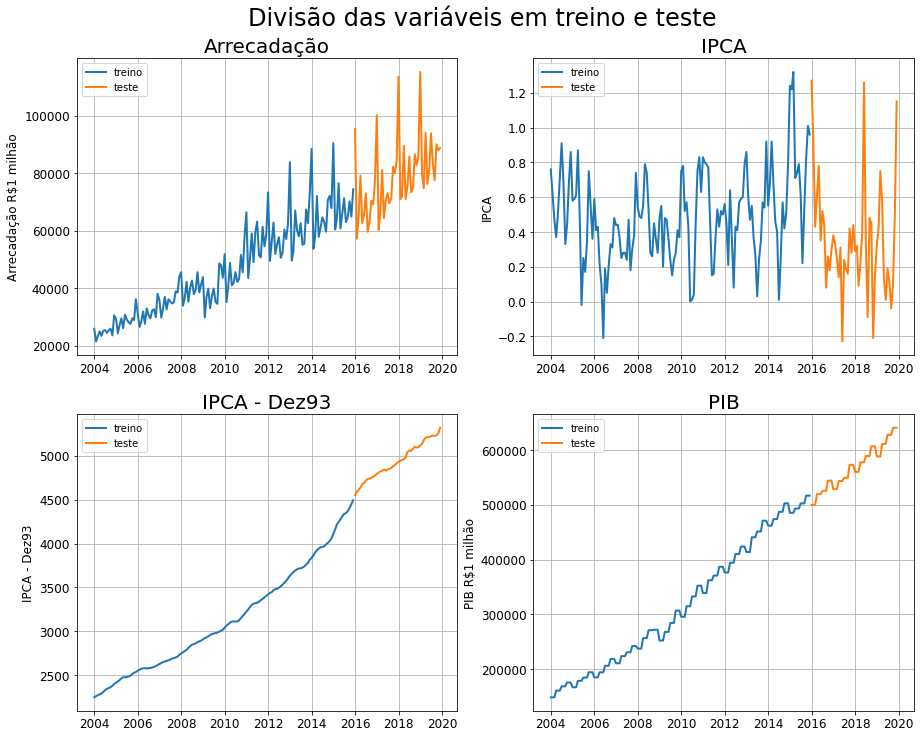

In [11]:
plt.rcParams['figure.figsize'] = (15, 12)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Divisão das variáveis em treino e teste', fontsize=24, y=0.94)

ax1.plot(train['arrecadacao'], label='treino')
ax1.plot(test['arrecadacao'], label='teste')
ax2.plot(train['IPCA'], label='treino')
ax2.plot(test['IPCA'], label='teste')
ax3.plot(train['IPCA_dez93'], label='treino')
ax3.plot(test['IPCA_dez93'], label='teste')
ax4.plot(train['PIB'], label='treino')
ax4.plot(test['PIB'], label='teste')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_ylabel('Arrecadação R$1 milhão')
ax2.set_ylabel('IPCA')
ax3.set_ylabel('IPCA - Dez93')
ax4.set_ylabel('PIB R$1 milhão')

ax1.set_title('Arrecadação')
ax2.set_title('IPCA')
ax3.set_title('IPCA - Dez93')
ax4.set_title('PIB')

ax1.grid(True, axis='both')
ax2.grid(True, axis='both')
ax3.grid(True, axis='both')
ax4.grid(True, axis='both')

In [12]:
# Variações possíveis entre as variáveis exógenas
exogenas = ('univariado', ['PIB'], ['IPCA'], ['IPCA_dez93'], ['IPCA', 'IPCA_dez93'], ['IPCA', 'PIB'], ['IPCA_dez93', 'PIB'], ['IPCA', 'IPCA_dez93', 'PIB'])
exogenas

('univariado',
 ['PIB'],
 ['IPCA'],
 ['IPCA_dez93'],
 ['IPCA', 'IPCA_dez93'],
 ['IPCA', 'PIB'],
 ['IPCA_dez93', 'PIB'],
 ['IPCA', 'IPCA_dez93', 'PIB'])

In [13]:
# Gera os modelos com a diversas combinações de variáveis
modelos = []
trace = False
random_state = 77 # Para permitir reproducibilidade


for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        modelos.append(auto_arima(train['arrecadacao'],
                               start_p=1, start_q=1, max_p=5, max_q=5, m=12, seasonal=True, max_d=2, max_D=2,
                               start_P=0, start_Q=0, max_P=5, max_Q=5, d=0, D=1, error_action='warn',
                               trace=trace, supress_warnings=True, stepwise=True, random_state=random_state))
    else:
        print(f'Modelo multivariado: {exogena}')
        modelos.append(auto_arima(train['arrecadacao'], exogenous=train[exogena],
                               start_p=1, start_q=1, max_p=4, max_q=4, m=12, seasonal=True, 
                               start_P=1, start_Q=1, max_P=4, max_Q=4, d=0, D=1, error_action='warn', 
                               trace=trace, supress_warnings=True, stepwise=True, random_state=random_state))

Modelo univariado
Modelo multivariado: ['PIB']
Modelo multivariado: ['IPCA']
Modelo multivariado: ['IPCA_dez93']
Modelo multivariado: ['IPCA', 'IPCA_dez93']
Modelo multivariado: ['IPCA', 'PIB']
Modelo multivariado: ['IPCA_dez93', 'PIB']
Modelo multivariado: ['IPCA', 'IPCA_dez93', 'PIB']


In [14]:
# Armazena o AIC e a ordens de cada modelo
aic = []
order = []

for model in modelos:
    aic.append(f'{model.aic():.2f}')  
    if model.fit_with_exog_:
        order.append(f'SARIMAX{model.order}{model.seasonal_order}')
    else:
        order.append(f'SARIMA{model.order}{model.seasonal_order}')

In [15]:
#Gera as previsões na mesma quantidade de períodos do "test"
previsoes = []
periodos = len(test)
index_col = test.index
indice = 0

for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        previsoes.append(pd.DataFrame(modelos[indice].predict(n_periods=periodos), 
                                      index=index_col, columns=['previsao']))
    else:
        print(f'Modelo multivariado: {exogena}')
        previsoes.append(pd.DataFrame(modelos[indice].predict(n_periods=periodos, exogenous=test[exogena]), 
                                      index=index_col, columns=['previsao']))
    indice += 1


Modelo univariado
Modelo multivariado: ['PIB']
Modelo multivariado: ['IPCA']
Modelo multivariado: ['IPCA_dez93']
Modelo multivariado: ['IPCA', 'IPCA_dez93']
Modelo multivariado: ['IPCA', 'PIB']
Modelo multivariado: ['IPCA_dez93', 'PIB']
Modelo multivariado: ['IPCA', 'IPCA_dez93', 'PIB']


In [16]:
# Cálculo MAPE, RMSE e R2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

rmse = []
r2 = []
r2_ajustado = []
mape = []

i=0
for previsao in previsoes:
    # Calcula o erro RMSE
    rmse.append(np.sqrt(mean_squared_error(test['arrecadacao'], previsao)))

    # Cálculo do coeficiente de determinação, também chamado de R²
    r2.append(r2_score(test['arrecadacao'], previsao))
    
    # Cálculo R² Ajustado
    n = len(train)
    k = len(exogenas[i]) # exemplo: 3 -> arrecadação, IPCA e PIB
    r2_ajustado.append(1 - (1-r2[-1])*(n-1)/(n-k-1))

    # Mean absolute percentage error (MAPE) - a measure of prediction accuracy of a forecasting method in statistics
    mape.append(mean_absolute_percentage_error(test['arrecadacao'], previsao) * 100)
    
    i+=1

In [17]:
# Agrega todos os modelos
df_modelos = pd.DataFrame(list(zip(exogenas, order, aic, rmse, r2, r2_ajustado, mape, previsoes, modelos)), 
             columns=['Variáveis','Ordem do Modelo', 'AIC do Modelo', 'RMSE', 'R2', 'R2 Ajustado', 'MAPE (%)', 'Previsões', 'Modelo pmdarima' ])
df_modelos

,Variáveis,Ordem do Modelo,AIC do Modelo,RMSE,R2,R2 Ajustado,MAPE (%),Previsões,Modelo pmdarima
0,univariado,"SARIMA(1, 0, 3)(0, 1, 1, 12)",2543.92,4022.06,0.90,0.89,4.52,previsao data 2016...,"ARIMA(1,0,3)(0,1,1)[12] intercept"
1,[PIB],"SARIMAX(3, 0, 0)(1, 1, 2, 12)",2511.10,3953.02,0.90,0.90,3.74,previsao data 2016...,"ARIMA(3,0,0)(1,1,2)[12] intercept"
2,[IPCA],"SARIMAX(1, 0, 0)(0, 1, 1, 12)",2552.41,4234.44,0.88,0.88,4.27,previsao data 2016...,"ARIMA(1,0,0)(0,1,1)[12] intercept"
3,[IPCA_dez93],"SARIMAX(3, 0, 2)(2, 1, 0, 12)",2526.29,4448.91,0.87,0.87,4.27,previsao data 2016...,"ARIMA(3,0,2)(2,1,0)[12] intercept"
4,"[IPCA, IPCA_dez93]","SARIMAX(1, 0, 1)(1, 1, 0, 12)",2532.06,4323.17,0.88,0.88,4.60,previsao data 2016...,"ARIMA(1,0,1)(1,1,0)[12] intercept"
5,"[IPCA, PIB]","SARIMAX(3, 0, 0)(1, 1, 2, 12)",2514.96,4158.41,0.89,0.89,3.99,previsao data 2016...,"ARIMA(3,0,0)(1,1,2)[12] intercept"
6,"[IPCA_dez93, PIB]","SARIMAX(3, 0, 0)(1, 1, 2, 12)",2512.48,3215.48,0.93,0.93,3.32,previsao data 2016...,"ARIMA(3,0,0)(1,1,2)[12]"
7,"[IPCA, IPCA_dez93, PIB]","SARIMAX(3, 0, 0)(1, 1, 2, 12)",2516.42,3299.85,0.93,0.93,3.42,previsao data 2016...,"ARIMA(3,0,0)(1,1,2)[12]"


In [18]:
# Melhores modelos
index_uni = 0
index_mul = 6

#Modelos
model_uni = df_modelos.loc[index_uni]['Modelo pmdarima']
model_mul = df_modelos.loc[index_mul]['Modelo pmdarima']

#Resíduos
residuos_uni = model_uni.resid()
residuos_mul = model_mul.resid()

# Previsões
previsao_uni = df_modelos.loc[index_uni]['Previsões']
previsao_mul = df_modelos.loc[index_mul]['Previsões']

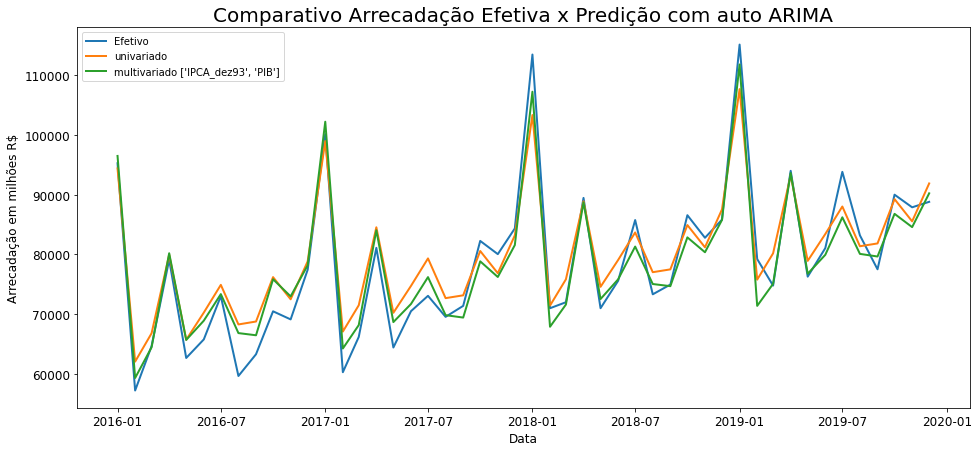

In [19]:
plt.figure(figsize = (16,7))
plt.title('Comparativo Arrecadação Efetiva x Predição com auto ARIMA')
plt.plot(df_efetiva['arrecadacao'][-48:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.plot(previsao_mul, label = f"multivariado {df_modelos['Variáveis'][index_mul]}")
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.ylabel('Arrecadação em milhões R$')
plt.show()

In [20]:
# Padronização do valor dos resíduos

res_mul = model_mul.resid()[12:]
res_uni = model_uni.resid()[12:]
res_uni = pd.Series(res_uni, index=res_mul.index)

res_uni_std = res_uni/np.std(res_uni)
res_mul_std = res_mul/np.std(res_mul)

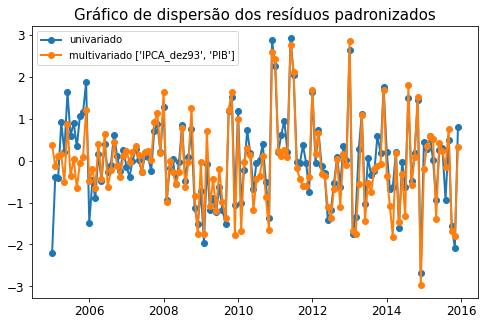

In [21]:
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()
plt.title('Gráfico de dispersão dos resíduos padronizados', fontsize=15)
ax.plot(res_uni_std.index, res_uni_std, label='univariado', marker='o')
ax.plot(res_mul_std.index, res_mul_std, label=f"multivariado {df_modelos['Variáveis'][index_mul]}", marker='o')
plt.legend(loc = 'upper left');

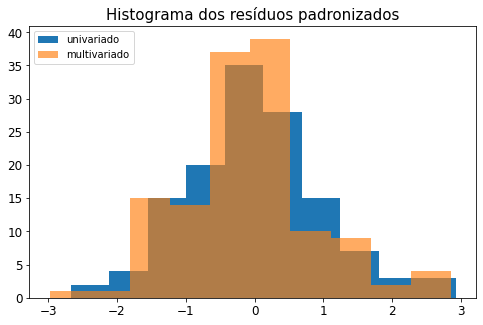

In [22]:
plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()
plt.title('Histograma dos resíduos padronizados', fontsize=15)
ax.hist(res_uni_std, label='univariado')
ax.hist(res_mul_std, label=f"multivariado", alpha=0.65);
ax.legend(loc='upper left');

In [23]:
# Apesar do histograma se assemelhar a uma distribuição normal, pode ser realizado um
# Teste de Shapiro-Wilk para se certificar
import scipy.stats as stats

def shapiro_test(residuos):
    shapiro_stats, shapiro_p_value = stats.shapiro(residuos)

    print (f'O valor-p de Shapiro-Wilk: {shapiro_p_value:.4f}')
    print (f'O valor de Shapiro-Wilk Stats: {shapiro_stats:.4f}')

    #H0:Os erros têm distribuição normal;
    #H1:Os erros não têm distribuição normal.

    if shapiro_p_value >= 0.05:
        return("Não se rejeita a hipótese de normalidade dos erros, ao nível de 5% de significância.")
    else:
        return("Deve ser rejeitada a hipótese de normalidade dos erros, ao nível de 5% de significância.")

In [24]:
print(f"univariado:  {shapiro_test(res_uni_std)}\n")
print(f"Multivariado {df_modelos['Variáveis'][index_mul]} : {shapiro_test(res_mul_std)}\n")

O valor-p de Shapiro-Wilk: 0.1318
O valor de Shapiro-Wilk Stats: 0.9843
univariado:  Não se rejeita a hipótese de normalidade dos erros, ao nível de 5% de significância.

O valor-p de Shapiro-Wilk: 0.0037
O valor de Shapiro-Wilk Stats: 0.9686
Multivariado ['IPCA_dez93', 'PIB'] : Deve ser rejeitada a hipótese de normalidade dos erros, ao nível de 5% de significância.



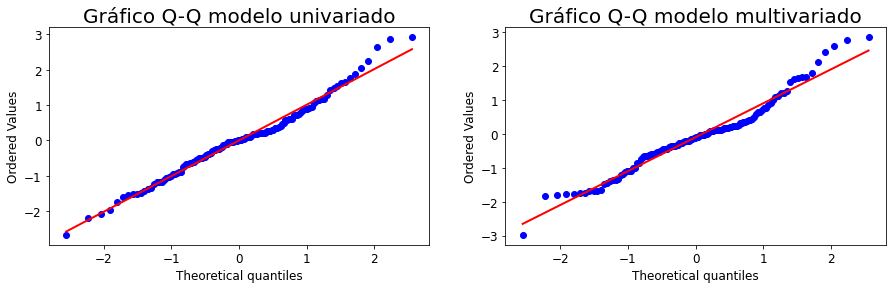

In [25]:
import scipy.stats

plt.rcParams['figure.figsize'] = (15, 4)
fig, (ax1, ax2) = plt.subplots(1,2)
scipy.stats.probplot(res_uni_std, dist="norm", plot=ax1);
scipy.stats.probplot(res_mul_std, dist="norm", plot=ax2);
ax1.title.set_text('Gráfico Q-Q modelo univariado')
ax2.title.set_text('Gráfico Q-Q modelo multivariado')

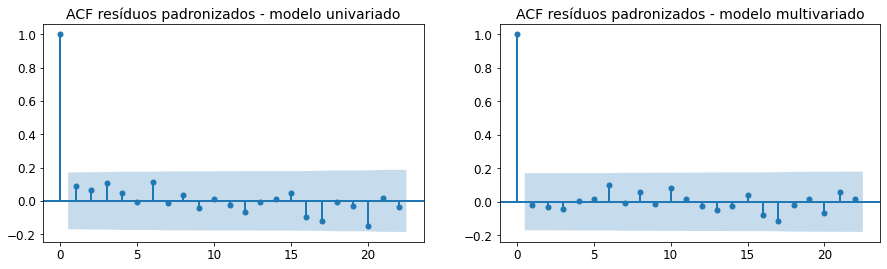

In [26]:
# Não é desejável que haja autocorrelação entre os resíduos, 
# o que indicaria que existe informação nos resíduos que deveria estar no modelo.
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.titlesize'] = 14
fig, (ax1, ax2) = plt.subplots(1,2)
plot_acf(res_uni_std, ax=ax1)
plot_acf(res_mul_std, ax=ax2);
ax1.set_title('ACF resíduos padronizados - modelo univariado', fontsize=14)
ax2.set_title('ACF resíduos padronizados - modelo multivariado', fontsize=14);

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

efetivo = test['arrecadacao']
predicao_uni = previsao_uni['previsao']
predicao_mul = previsao_mul['previsao']

# Calcula o erro RMSE
rmse_uni = np.sqrt(mean_squared_error(efetivo, predicao_uni))
rmse_mul = np.sqrt(mean_squared_error(efetivo, predicao_mul))

# Cálculo do coeficiente de determinação, também chamado de R²
r2_uni = r2_score(efetivo, predicao_uni)
r2_mul = r2_score(efetivo, predicao_mul)

# Mean absolute percentage error (MAPE)
mape_uni = mean_absolute_percentage_error(efetivo, predicao_uni) * 100
mape_mul = mean_absolute_percentage_error(efetivo, predicao_mul) * 100

In [28]:
print(f'RMSE univariado: {rmse_uni:.2f}')
print(f'RMSE multivariado: {rmse_mul:.2f}\n')

print(f'R2 univariado: {r2_uni:.2f}')
print(f'R2 multivariado: {r2_mul:.2f}\n')

print(f'MAPE univariado: {mape_uni:.2f}%')
print(f'MAPE multivariado: {mape_mul:.2f}%')

RMSE univariado: 4022.06
RMSE multivariado: 3215.48

R2 univariado: 0.90
R2 multivariado: 0.93

MAPE univariado: 4.52%
MAPE multivariado: 3.32%


In [29]:
# Carrega as previsões do modelo Prophet para comparação (notebook 06)
previsao_prophet = pd.read_csv(pasta+'previsao_prophet.csv', parse_dates=['ds'])
previsao_prophet.columns=['data', 'previsao']
previsao_prophet.set_index('data', inplace=True)

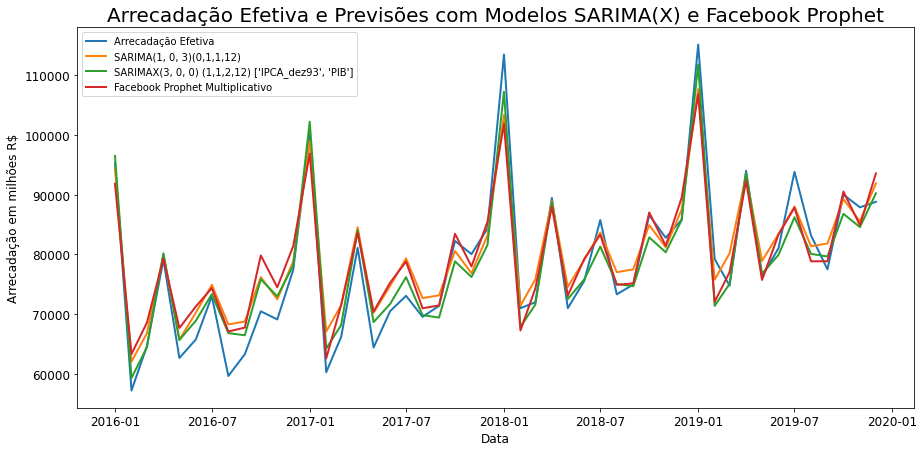

In [31]:
plt.rcParams['figure.figsize'] = (15, 7)
fig, ax = plt.subplots()
plt.title('Arrecadação Efetiva e Previsões com Modelos SARIMA(X) e Facebook Prophet')
ax.plot(df_efetiva['arrecadacao'][-48:], label = "Arrecadação Efetiva")
ax.plot(previsao_uni, label = "SARIMA(1, 0, 3)(0,1,1,12)")
ax.plot(previsao_mul, label = f"SARIMAX(3, 0, 0) (1,1,2,12) {df_modelos['Variáveis'][index_mul]}")
ax.plot(previsao_prophet[-48:], label = f"Facebook Prophet Multiplicativo")
ax.set_xlabel('Data')
ax.set_ylabel('Arrecadação em milhões R$')
ax.legend(loc = 'upper left')
plt.show()